### 1) Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [76]:
import pandas as pd
import seaborn as sns
import warnings as w
import matplotlib.pyplot as plt

%matplotlib inline

w.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = 50

In [5]:
bat_df = pd.read_csv('Batting.csv')

### 2) Print out the dimensions and info about the dataframe you just created

In [6]:
bat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [8]:
bat_df.shape

(102816, 25)

### 3) How many players have hit 40 or more HRs in one single season? (Number only)

In [16]:
bat_df[bat_df['HR']>=40]['playerID'].unique().size

142

### 4) How many players have hit more than 600 HRs for their career? (DataFrame)

In [ ]:
bat_tot_df=bat_df['HR'].groupby(bat_df['playerID']).agg({'Total':['sum']})

In [104]:
bat_tot_df.reset_index(inplace=True)

In [106]:
score=bat_tot_df['Total']>600

In [99]:
bat_tot_df.columns = ['Player ID', 'HRs']

In [100]:
bat_tot_df[score['sum']].

,Player ID,HRs
1,aaronha01,755
1542,bondsba01,762
6633,griffke02,630
10857,mayswi01,660
14528,rodrial01,696
14865,ruthba01,714
16103,sosasa01,609
17004,thomeji01,612


### 5) How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season?

In [8]:
bat_df[(bat_df['H'] >= 200) & (bat_df['HR'] >=30) & (bat_df['2B'] >= 40) & (bat_df['3B'] >= 10)]['playerID'].unique().size

11

### 6) How many players have had 100 or more SBs in a season? (Dataframe)

In [94]:
bat_df[(bat_df['SB']>=100)].groupby(['yearID'])['playerID'].count().to_frame('No. of Players (SB>100)')

,No. of Players (SB>100)
yearID,
1887,6
1888,2
1889,1
1890,1
1891,2
1962,1
1974,1
1980,1
1982,1


In [10]:
# List of players who have scored 100 or more SBs in a season

In [11]:
bat_df[bat_df['SB']>=100]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
3473,brownpe01,Pete,Browning,1861,1887,1,LS2,AA,134,547,137,220,35,16,4,118.0,103.0,NaN,55,NaN,NaN,8.0,NaN,NaN,NaN
3501,comisch01,Charlie,Comiskey,1859,1887,1,SL4,AA,125,538,139,180,22,5,4,103.0,117.0,NaN,27,NaN,NaN,7.0,NaN,NaN,NaN
3546,fogarji01,Jim,Fogarty,1864,1887,1,PHI,NL,126,495,113,129,26,12,8,50.0,102.0,NaN,82,44.0,NaN,10.0,NaN,NaN,NaN
3617,lathaar01,Arlie,Latham,1860,1887,1,SL4,AA,136,627,163,198,35,10,2,83.0,129.0,NaN,45,NaN,NaN,5.0,NaN,NaN,NaN
3667,nicolhu01,Hugh,Nicol,1858,1887,1,CN2,AA,125,475,122,102,18,2,1,34.0,138.0,NaN,86,NaN,NaN,5.0,NaN,NaN,NaN
3764,wardjo01,John,Ward,1860,1887,1,NY1,NL,129,545,114,184,16,5,1,53.0,111.0,NaN,29,12.0,NaN,4.0,NaN,NaN,NaN
3975,lathaar01,Arlie,Latham,1860,1888,1,SL4,AA,133,570,119,151,19,5,2,31.0,109.0,NaN,43,NaN,NaN,8.0,NaN,NaN,NaN
4014,nicolhu01,Hugh,Nicol,1858,1888,1,CN2,AA,135,548,112,131,10,2,1,35.0,103.0,NaN,67,NaN,NaN,7.0,NaN,NaN,NaN
4278,hamilbi01,Billy,Hamilton,1866,1889,1,KC2,AA,137,534,144,161,17,12,3,77.0,111.0,NaN,87,41.0,NaN,14.0,NaN,NaN,NaN
4696,hamilbi01,Billy,Hamilton,1866,1890,1,PHI,NL,123,496,133,161,13,9,2,49.0,102.0,NaN,83,37.0,NaN,9.0,NaN,NaN,NaN


### 7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [22]:
x = bat_df[(bat_df['yearID']>=1960) & (bat_df['yearID']<=1969)].groupby('playerID')['HR'].sum().to_frame('HR_Total')

x[x['HR_Total']>200] 

,HR_Total
playerID,
aaronha01,375
allisbo01,225
bankser01,269
cashno01,278
cepedor01,254
colavro01,245
howarfr01,288
kalinal01,210
killeha01,393


### 8)	Who has hit the most HRs in history? (Dataframe)

In [104]:
hr_df=bat_df.groupby(['playerID','nameFirst','nameLast'])['HR'].sum().to_frame('Total_HRs')

In [105]:
hr_df[hr_df.Total_HRs==hr_df.Total_HRs.max()]

,,,Total_HRs
playerID,nameFirst,nameLast,
bondsba01,Barry,Bonds,762


### 9)	Who had the most hits in the 1970s? 

In [32]:
H_df=bat_df[(bat_df['yearID']>=1970) & (bat_df['yearID']<=1979)].groupby(['playerID','nameFirst','nameLast'])['H'].sum().to_frame('Total_hits')

In [35]:
H_df.sort_values('Total_hits', ascending=False).head(1)

,,,Total_hits
playerID,nameFirst,nameLast,
rosepe01,Pete,Rose,2045


### 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [36]:
bat_df['PA'] =  bat_df[['AB', 'BB', 'IBB', 'SH', 'SF']].sum(axis=1)

In [37]:
bat_df['OBP'] = bat_df[['H', 'BB', 'IBB', 'SH', 'SF']].sum(axis=1)/bat_df['AB']

In [40]:
d1=bat_df[(bat_df['PA']>=500) & (bat_df['yearID']==1977)]

In [41]:
d1.nlargest(5,'OBP')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
55273,singlke01,Ken,Singleton,1947,1977,1,BAL,AL,152,536,90,176,24,0,24,99.0,0.0,1.0,107,101.0,13.0,2.0,0.0,6.0,15.0,662.0,0.563433
55280,smithre06,Reggie,Smith,1945,1977,1,LAN,NL,148,488,104,150,27,4,32,87.0,7.0,5.0,104,76.0,11.0,3.0,1.0,7.0,5.0,611.0,0.559426
55329,tenacge01,Gene,Tenace,1946,1977,1,SDN,NL,147,437,66,102,24,4,15,61.0,5.0,3.0,125,119.0,10.0,13.0,2.0,4.0,5.0,578.0,0.556064
54820,hargrmi01,Mike,Hargrove,1949,1977,1,TEX,AL,153,525,98,160,28,4,18,69.0,2.0,5.0,103,59.0,7.0,6.0,8.0,6.0,13.0,649.0,0.540952
54603,carewro01,Rod,Carew,1945,1977,1,MIN,AL,155,616,128,239,38,16,14,100.0,23.0,13.0,69,55.0,15.0,3.0,1.0,5.0,6.0,706.0,0.534091


### 11)	Top 8 highest averages in 2013 with at least 300 PAs? 


In [147]:
bat_df['avg'] = bat_df['H']/bat_df['AB']

In [45]:
bat_df[(bat_df['yearID']==2013) & (bat_df['PA']>=300)].nlargest(8,'avg')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,avg
97188,cabremi01,Miguel,Cabrera,1983,2013,1,DET,AL,148,555,103,193,26,1,44,137.0,3.0,0.0,90,94.0,19.0,5.0,0.0,2.0,19.0,666.0,0.547748,0.347748
98062,ramirha01,Hanley,Ramirez,1983,2013,1,LAN,NL,86,304,62,105,25,2,20,57.0,10.0,2.0,27,52.0,3.0,3.0,0.0,2.0,5.0,336.0,0.450658,0.345395
97300,cuddymi01,Michael,Cuddyer,1979,2013,1,COL,NL,130,489,74,162,31,3,20,84.0,10.0,3.0,46,100.0,5.0,2.0,0.0,3.0,13.0,543.0,0.441718,0.331288
97825,mauerjo01,Joe,Mauer,1983,2013,1,MIN,AL,113,445,62,144,35,0,11,47.0,0.0,1.0,61,89.0,7.0,0.0,0.0,2.0,7.0,515.0,0.480899,0.323596
98293,troutmi01,Mike,Trout,1991,2013,1,LAA,AL,157,589,109,190,39,9,27,97.0,33.0,7.0,110,136.0,10.0,9.0,0.0,8.0,8.0,717.0,0.539898,0.322581
97651,johnsch05,Chris,Johnson,1984,2013,1,ATL,NL,142,514,54,165,34,0,12,68.0,0.0,0.0,29,116.0,5.0,2.0,0.0,2.0,20.0,550.0,0.391051,0.321012
97437,freemfr01,Freddie,Freeman,1989,2013,1,ATL,NL,147,551,89,176,27,2,23,109.0,1.0,0.0,66,121.0,10.0,7.0,0.0,5.0,10.0,632.0,0.466425,0.319419
98043,puigya01,Yasiel,Puig,1990,2013,1,LAN,NL,104,382,66,122,21,2,19,42.0,11.0,8.0,36,97.0,6.0,11.0,0.0,3.0,6.0,427.0,0.437173,0.319372


### 12) Leaders in hits (Top 10) from 1940 up to and including 1949. (Dataframe)

In [44]:
bat_df[(bat_df['yearID']>=1940) & (bat_df['yearID']<=1949)].nlargest(10,'H')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,avg
33671,musiast01,Stan,Musial,1920,1948,1,SLN,NL,155,611,135,230,46,18,39,131.0,7.0,NaN,79,34.0,NaN,3.0,1.0,NaN,18.0,691.0,0.507365,0.376432
32499,musiast01,Stan,Musial,1920,1946,1,SLN,NL,156,624,124,228,50,20,16,103.0,7.0,NaN,73,31.0,NaN,3.0,2.0,NaN,7.0,699.0,0.485577,0.365385
31720,holmeto01,Tommy,Holmes,1917,1945,1,BSN,NL,154,636,125,224,47,6,28,117.0,15.0,NaN,70,9.0,NaN,4.0,3.0,NaN,11.0,709.0,0.466981,0.352201
30709,musiast01,Stan,Musial,1920,1943,1,SLN,NL,157,617,108,220,48,20,13,81.0,9.0,NaN,72,18.0,NaN,2.0,10.0,NaN,17.0,699.0,0.489465,0.356564
29747,travice01,Cecil,Travis,1913,1941,1,WS1,AL,152,608,106,218,39,19,7,101.0,2.0,2.0,52,25.0,NaN,1.0,2.0,NaN,13.0,662.0,0.447368,0.358553
32536,peskyjo01,Johnny,Pesky,1919,1946,1,BOS,AL,153,621,115,208,43,4,2,55.0,9.0,8.0,65,29.0,NaN,3.0,14.0,NaN,8.0,700.0,0.462158,0.334944
32673,vernomi01,Mickey,Vernon,1918,1946,1,WS1,AL,148,587,88,207,51,8,8,85.0,14.0,10.0,49,64.0,NaN,0.0,2.0,NaN,12.0,638.0,0.439523,0.352641
33128,peskyjo01,Johnny,Pesky,1919,1947,1,BOS,AL,155,638,106,207,27,8,0,39.0,12.0,9.0,72,22.0,NaN,0.0,9.0,NaN,10.0,719.0,0.451411,0.324451
33420,dillibo01,Bob,Dillinger,1918,1948,1,SLA,AL,153,644,110,207,34,10,2,44.0,28.0,11.0,65,34.0,NaN,1.0,12.0,NaN,18.0,721.0,0.440994,0.321429
34242,musiast01,Stan,Musial,1920,1949,1,SLN,NL,157,612,128,207,41,13,36,123.0,3.0,NaN,107,38.0,NaN,2.0,0.0,NaN,12.0,719.0,0.513072,0.338235


### 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [100]:
h_df=bat_df.groupby('yearID')['playerID','nameFirst','nameLast','H'].max()

In [105]:
x=h_df.groupby('playerID')['H'].count()

In [116]:
x.sort_values(ascending=False).head(1).to_frame('No.')

,No.
playerID,
zimmech01,18


In [96]:
x.sort_values(ascending=False).head(1)

playerID
zimmech01    18
Name: H, dtype: int64

### 14) Which players have played the most games for their careers? Top 5, descending by games played presented as a dataframe

In [117]:
bat_df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [119]:
d2=bat_df.groupby('playerID')['G'].sum()

In [121]:
d2.sort_values(ascending=False).head(5).to_frame('No. of games')

,No. of games
playerID,
rosepe01,3562
yastrca01,3308
aaronha01,3298
henderi01,3081
cobbty01,3035


### 15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [123]:
d3=bat_df.groupby('playerID')['H', 'HR'].sum()

In [138]:
d3[(d3['H']>=3000) & (d3['HR']>=500)].shape[0]

5

### 16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [141]:
bat_df[bat_df['yearID']==1988]['HR'].sum()

3180

### 17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [154]:
bat_df[(bat_df['nameFirst']=='Wade') & (bat_df['nameLast']=='Boggs') & (bat_df['AB']>=500)].sort_values('avg',ascending=False).head(3)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,avg
62316,boggswa01,Wade,Boggs,1958,1985,1,BOS,AL,161,653,107,240,42,3,8,78.0,2.0,1.0,96,61.0,5.0,4.0,3.0,2.0,20.0,759.0,0.529862,0.367534
65391,boggswa01,Wade,Boggs,1958,1988,1,BOS,AL,155,584,128,214,45,6,5,58.0,2.0,3.0,125,34.0,18.0,3.0,0.0,7.0,23.0,734.0,0.623288,0.366438
64335,boggswa01,Wade,Boggs,1958,1987,1,BOS,AL,147,551,108,200,40,6,24,89.0,1.0,3.0,105,48.0,19.0,2.0,1.0,8.0,13.0,684.0,0.604356,0.362976


### 18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [161]:
bat_df[(bat_df['yearID']==1995) & (bat_df['PA']>=400)].sort_values('OBP', ascending=False).head(10)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,avg
73996,thomafr04,Frank,Thomas,1968,1995,1,CHA,AL,145,493,102,152,27,0,40,111.0,3.0,2.0,136,74.0,29.0,6.0,0.0,12.0,14.0,670.0,0.667343,0.308316
73578,martied01,Edgar,Martinez,1963,1995,1,SEA,AL,145,511,121,182,52,0,29,113.0,4.0,3.0,116,87.0,19.0,8.0,0.0,4.0,11.0,650.0,0.628180,0.356164
73611,mcgwima01,Mark,McGwire,1963,1995,1,OAK,AL,104,317,75,87,13,0,39,90.0,1.0,1.0,88,77.0,5.0,11.0,0.0,6.0,9.0,416.0,0.586751,0.274448
73002,bondsba01,Barry,Bonds,1964,1995,1,SFN,NL,144,506,109,149,30,7,33,104.0,31.0,10.0,120,83.0,22.0,5.0,0.0,4.0,12.0,652.0,0.583004,0.294466
73145,davisch01,Chili,Davis,1960,1995,1,CAL,AL,119,424,81,135,23,0,20,86.0,3.0,3.0,89,79.0,12.0,0.0,0.0,9.0,12.0,534.0,0.577830,0.318396
73560,magadda01,Dave,Magadan,1962,1995,1,HOU,NL,127,348,44,109,24,0,2,51.0,2.0,1.0,71,56.0,9.0,0.0,1.0,2.0,9.0,431.0,0.551724,0.313218
73999,thomeji01,Jim,Thome,1970,1995,1,CLE,AL,137,452,92,142,29,3,25,73.0,4.0,3.0,97,113.0,3.0,5.0,0.0,3.0,8.0,555.0,0.542035,0.314159
72937,baineha01,Harold,Baines,1959,1995,1,BAL,AL,127,385,60,115,19,1,24,63.0,0.0,2.0,70,45.0,13.0,0.0,0.0,4.0,17.0,472.0,0.524675,0.298701
74080,weisswa01,Walt,Weiss,1963,1995,1,COL,NL,137,427,65,111,17,3,1,25.0,15.0,3.0,98,57.0,8.0,5.0,6.0,1.0,7.0,540.0,0.524590,0.259953
72999,boggswa01,Wade,Boggs,1958,1995,1,NYA,AL,126,460,76,149,22,4,5,63.0,1.0,1.0,74,50.0,5.0,0.0,0.0,7.0,13.0,546.0,0.510870,0.323913


### 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?

In [95]:
d4 = bat_df[(bat_df['yearID']==1922) | (bat_df['yearID']==1925) | (bat_df['yearID']==1926) | (bat_df['yearID']==1928)]

In [98]:
d4.groupby(['playerID','nameFirst','nameLast'])['3B'].sum().to_frame('3B').sort_values('3B',ascending=False).head(1)

,,,3B
playerID,nameFirst,nameLast,
walkecu01,Curt,Walker,59


### 20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?

In [180]:
bat_df[(bat_df['HR']>=30) & (bat_df['SB']>=30)]['playerID'].unique().size

37

### 21) Who had the highest OBP is 1986 with at least 400 PAs?

In [184]:
bat_df[(bat_df['yearID']==1986) & (bat_df['PA']>=400)].sort_values('OBP', ascending=False).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,avg
63320,boggswa01,Wade,Boggs,1958,1986,1,BOS,AL,149,580,107,207,47,2,8,71.0,0.0,4.0,105,44.0,14.0,0.0,4.0,4.0,11.0,707.0,0.575862,0.356897


### 22) Same question but for 1997 and only in the NL (check league ID)?

In [186]:
bat_df[(bat_df['yearID']==1997) & (bat_df['PA']>=400) & (bat_df['lgID']=='NL')].sort_values('OBP', ascending=False).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,avg
75505,bondsba01,Barry,Bonds,1964,1997,1,SFN,NL,159,532,123,155,26,5,40,101.0,37.0,8.0,145,87.0,34.0,8.0,0.0,5.0,13.0,716.0,0.637218,0.291353


### 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)?

In [188]:
# d_avg=bat_df[bat_df['yearID']==2012]
# d_avg['HR'].mean()
# d_avg[(d_avg['HR']>d_avg['HR'].mean()) & (d_avg['PA']<500)]

In [ ]:
# Assuming league average 'HR' is the overall average 'HR' throughout the batting dataset 

In [240]:
bat_df[(bat_df['HR']>bat_df['HR'].mean()) & (bat_df['yearID']==2012) & (bat_df['PA']<500)]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,avg,age
95598,abreubo01,Bobby,Abreu,1974,2012,2,LAN,NL,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,233.0,0.441026,0.246154,38
95621,amarial01,Alexi,Amarista,1989,2012,2,SDN,NL,105,275,35,66,15,5,5,32.0,8.0,4.0,17,42.0,1.0,0.0,6.0,2.0,2.0,301.0,0.334545,0.240000,23
95626,andinro01,Robert,Andino,1984,2012,1,BAL,AL,127,384,41,81,13,1,7,28.0,5.0,5.0,37,100.0,0.0,2.0,7.0,1.0,13.0,429.0,0.328125,0.210938,28
95628,ankieri01,Rick,Ankiel,1979,2012,1,WAS,NL,68,158,15,36,10,2,5,15.0,1.0,3.0,12,59.0,3.0,0.0,1.0,0.0,3.0,174.0,0.329114,0.227848,33
95631,arencjp01,J. P.,Arencibia,1986,2012,1,TOR,AL,102,347,45,81,16,0,18,56.0,1.0,0.0,18,108.0,1.0,3.0,1.0,3.0,4.0,370.0,0.299712,0.233429,26
95632,ariasjo01,Joaquin,Arias,1984,2012,1,SFN,NL,112,319,30,86,13,5,5,34.0,5.0,1.0,13,44.0,4.0,5.0,2.0,5.0,12.0,343.0,0.344828,0.269592,28
95639,avilaal01,Alex,Avila,1987,2012,1,DET,AL,116,367,42,89,21,2,9,48.0,2.0,0.0,61,104.0,2.0,2.0,2.0,2.0,12.0,434.0,0.425068,0.242507,25
95649,bakerje03,Jeff,Baker,1981,2012,1,CHN,NL,54,134,16,36,10,1,4,20.0,4.0,1.0,8,28.0,0.0,0.0,0.0,2.0,4.0,144.0,0.343284,0.268657,31
95655,barajro01,Rod,Barajas,1975,2012,1,PIT,NL,104,321,29,66,11,0,11,31.0,0.0,0.0,29,69.0,5.0,7.0,0.0,4.0,4.0,359.0,0.323988,0.205607,37
95657,barmecl01,Clint,Barmes,1979,2012,1,PIT,NL,144,455,34,104,16,1,8,45.0,0.0,2.0,20,106.0,3.0,8.0,8.0,2.0,9.0,488.0,0.301099,0.228571,33


### 24) Who is the youngest player to hit 50 or more HRs in a single season?

In [60]:
bat_df['age'] = bat_df['yearID'] - bat_df['birthYear']

In [61]:
bat_df[bat_df['HR']>=50].sort_values('age',ascending=True).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,age
89082,fieldpr01,Prince,Fielder,1984,2007,1,MIL,NL,158,573,109,165,35,2,50,119.0,2.0,2.0,90,121.0,21.0,14.0,0.0,4.0,9.0,688.0,0.488656,23


### 25) Who are the five youngest players to hit 300 or more HRs for their career?

In [62]:
df7 = bat_df.groupby('playerID')['HR'].sum().to_frame()

In [63]:
x=df7[df7['HR']>=300]

In [64]:
x.reset_index(inplace=True)

In [68]:
x_bat_df = x.merge(bat_df,left_on='playerID', right_on='playerID', how='inner')

In [67]:
x_bat_df.groupby(['playerID','nameFirst','nameLast','HR_x'])['age'].max().to_frame().sort_values('age',ascending=True).head(5)

,,,,age
playerID,nameFirst,nameLast,HR_x,
fieldpr01,Prince,Fielder,319,32
encared01,Edwin,Encarnacion,310,33
kinerra01,Ralph,Kiner,369,33
cabremi01,Miguel,Cabrera,446,33
sexsori01,Richie,Sexson,306,34


## Bonus Questions

### 1) Graph total HRs per season using bar graph

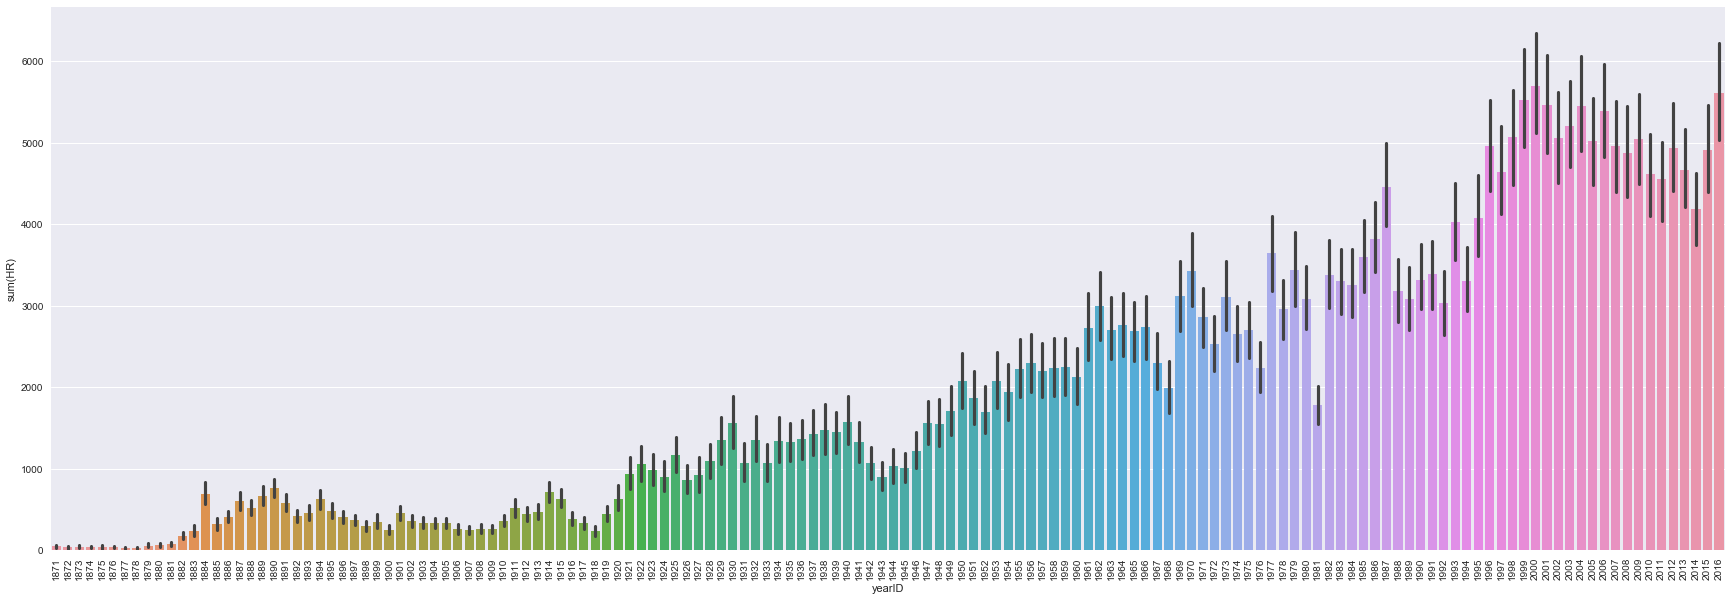

In [255]:
fig, ax = plt.subplots(figsize=(30,10))
g=sns.barplot(x='yearID',y='HR',data=bat_df,estimator=sum, ax=ax)

for item in g.get_xticklabels():
    item.set_rotation(90)


### 2) Using a line graph please graph the average HRs per AB (think about this) per season

In [85]:
a= bat_df.groupby('yearID')['HR'].sum().to_frame('Total_HR')

In [86]:
b= bat_df.groupby('yearID')['AB'].sum().to_frame('Total_AB')

In [87]:
a.reset_index(inplace=True)
b.reset_index(inplace=True)

In [88]:
ay = a.merge(b,left_on='yearID', right_on='yearID', how='inner')

In [89]:
ay['avg_HR_AB']=ay['Total_HR']/ay['Total_AB']

In [90]:
ay.head()

,yearID,Total_HR,Total_AB,avg_HR_AB
0,1871,47,10822,0.004343
1,1872,35,15679,0.002232
2,1873,46,16974,0.002710
3,1874,40,19104,0.002094
4,1875,40,26833,0.001491


Text(0,0.5,'Average HRs per AB')

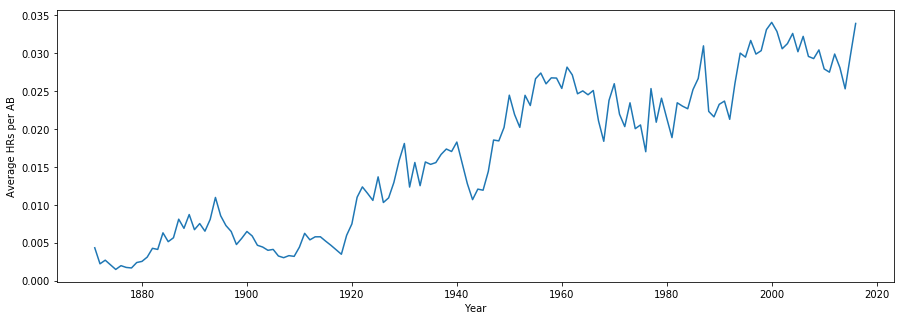

In [93]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ay['yearID'], ay['avg_HR_AB'])
ax.set_xlabel('Year')
ax.set_ylabel('Average HRs per AB')